<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/Stroke%20Prediction%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import os

In [ ]:
dat = pd.read_csv(r'/content/healthcare-dataset-stroke-data.csv')

In [ ]:
dat.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
dat.drop('id', axis=1, inplace=True)

In [ ]:
dat.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
dat.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
dat.drop('bmi', axis=1, inplace=True)

In [ ]:
dat.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
dat.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [ ]:
dat.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status',
       'stroke'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


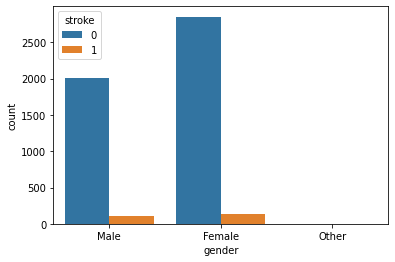

In [ ]:
import seaborn as sns

sns.countplot(dat['gender'], hue=dat['stroke'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


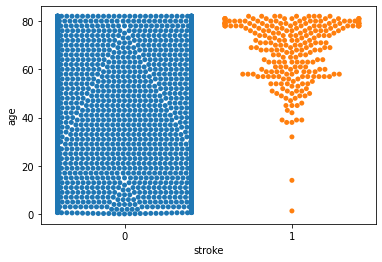

In [ ]:
sns.swarmplot(x=dat['stroke'], y=dat['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


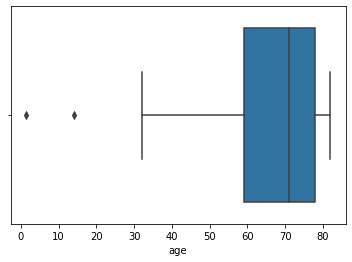

In [ ]:
sns.boxplot(dat[dat['stroke']==1]['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


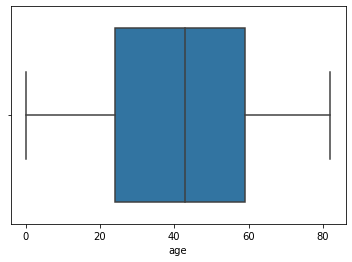

In [ ]:
sns.boxplot(dat[dat['stroke']==0]['age'])

In [ ]:
dat['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

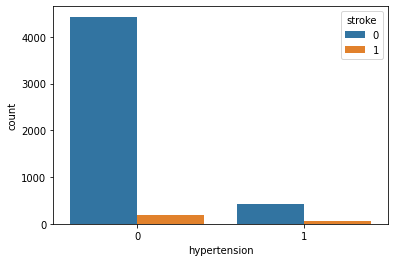

In [ ]:
sns.countplot(x=dat['hypertension'], hue=dat['stroke'])

In [ ]:
dat['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
dat['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

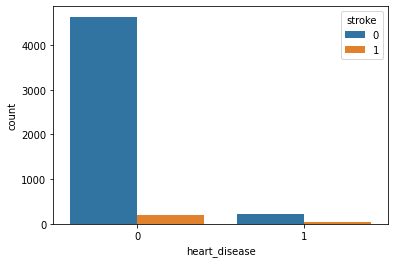

In [ ]:
sns.countplot(x= dat['heart_disease'], hue=dat['stroke'])

In [ ]:
dat['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

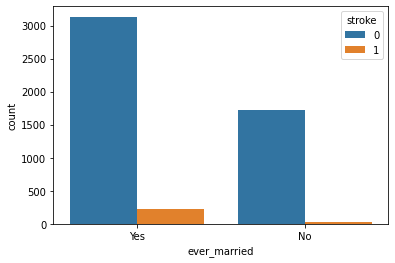

In [ ]:
sns.countplot(x=dat['ever_married'], hue=dat['stroke'])

In [ ]:
dat['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

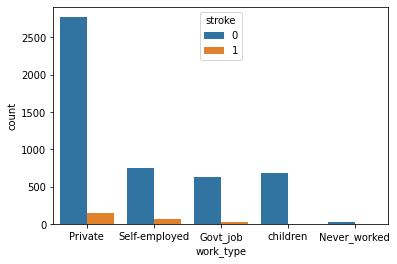

In [ ]:
sns.countplot(x=dat['work_type'], hue=dat['stroke'])

In [ ]:
dat['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

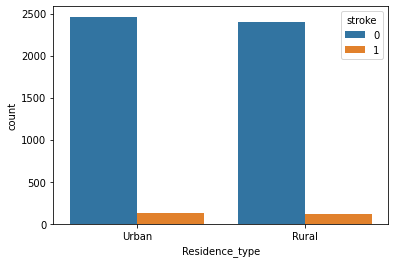

In [ ]:
sns.countplot(x=dat['Residence_type'], hue=dat['stroke'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


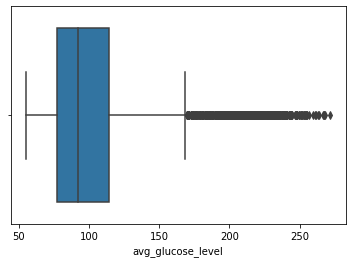

In [ ]:
sns.boxplot(dat['avg_glucose_level'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


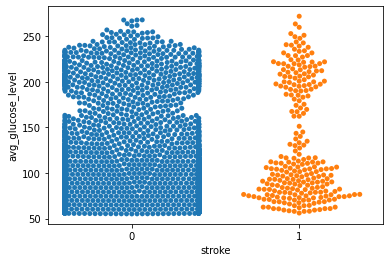

In [ ]:
sns.swarmplot(x=dat['stroke'], y=dat['avg_glucose_level'])

In [ ]:
dat['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

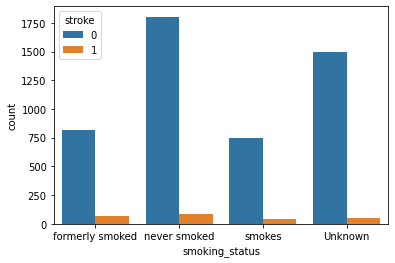

In [ ]:
sns.countplot(x=dat['smoking_status'], hue=dat['stroke'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


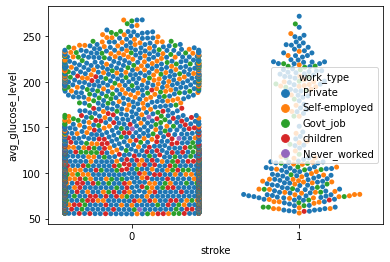

In [ ]:
sns.swarmplot(x=dat['stroke'], y=dat['avg_glucose_level'], hue=dat['work_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


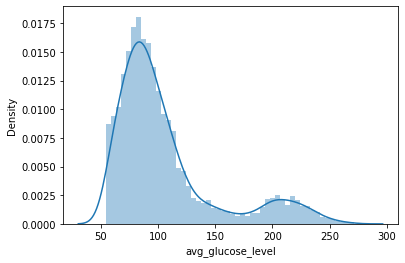

In [ ]:
sns.distplot(dat['avg_glucose_level'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


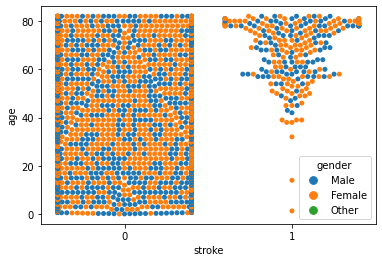

In [89]:
sns.swarmplot(x=dat['stroke'], y=dat['age'], hue=dat['gender'])

In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [97]:
obj_col = [i for i in dat.columns if dat[i].dtype == 'O']

In [98]:
obj_col

['gender', 'Residence_type', 'smoking_status']

In [100]:
for i in obj_col:

  le = LabelEncoder()

  dat[i] = le.fit_transform(dat[i])

In [102]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   Residence_type     5110 non-null   int64  
 5   avg_glucose_level  5110 non-null   float64
 6   smoking_status     5110 non-null   int64  
 7   stroke             5110 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 319.5 KB


1    120
Name: stroke, dtype: int64

In [172]:
X = dat.iloc[:,:-1]
y = dat.iloc[:,-1]

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

y_train.value_counts(), y_test.value_counts()

(0    3645
 1     187
 Name: stroke, dtype: int64, 0    1216
 1      62
 Name: stroke, dtype: int64)

In [228]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

smote = SMOTE('not majority')

dta = smote.fit_resample(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [229]:
X_sample = pd.DataFrame(dta[0])
y_sample = pd.DataFrame(dta[1])

In [230]:
X_sample.columns = X.columns

X_sample.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,smoking_status
0,0.0,24.0,0.0,0.0,1.0,104.86,2.0
1,0.0,33.0,0.0,0.0,1.0,84.48,2.0
2,1.0,44.0,0.0,0.0,1.0,103.44,2.0
3,0.0,76.0,0.0,0.0,1.0,183.34,1.0
4,0.0,62.0,0.0,0.0,1.0,88.32,0.0


In [231]:
y_sample.columns = ['stroke']

In [232]:
y_sample.value_counts()

stroke
1         3645
0         3645
dtype: int64

In [233]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

datos = pca.fit_transform(X_sample, y_sample)

In [234]:
datos = pd.DataFrame(datos)

In [235]:
frame = [datos, y_sample]

fram = pd.concat(frame, axis=1)

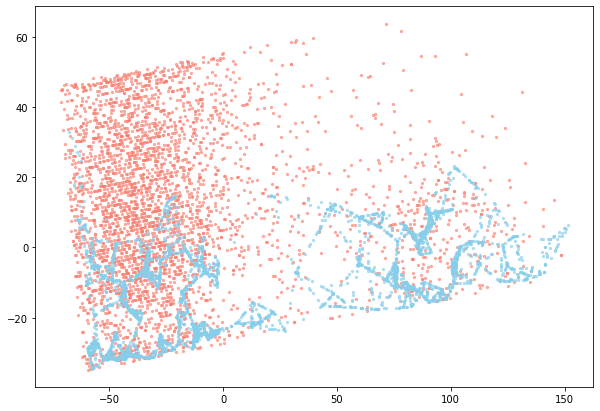

In [236]:
plt.figure(figsize=(10,7))

plt.scatter(fram[fram['stroke']==0].iloc[:,0], fram[fram['stroke']==0].iloc[:,1], s=5, alpha=0.6, c='salmon')
plt.scatter(fram[fram['stroke']==1].iloc[:,0], fram[fram['stroke']==1].iloc[:,1], s=5, alpha=0.6, c='skyblue')
plt.show()

In [238]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_sample, y_sample, stratify=y_sample)

In [252]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=0.01, solver='lbfgs').fit(X_trains, y_trains)

y_pred = logit.predict(X_tests)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [253]:
from sklearn.metrics import classification_report

print(classification_report(y_tests, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       912
           1       0.77      0.80      0.78       911

    accuracy                           0.78      1823
   macro avg       0.78      0.78      0.78      1823
weighted avg       0.78      0.78      0.78      1823



In [286]:
from sklearn.metrics import accuracy_score

train=[]
test=[]

c = np.linspace(0.01, 0.08, 100)

for i in c:

  log = LogisticRegression(C=i, solver='newton-cg').fit(X_trains, y_trains)

  y_pred = log.predict(X_tests)

  train_pred = log.predict(X_trains)

  train.append(accuracy_score(y_trains, train_pred))
  test.append(accuracy_score(y_tests, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [264]:
len(c)

100

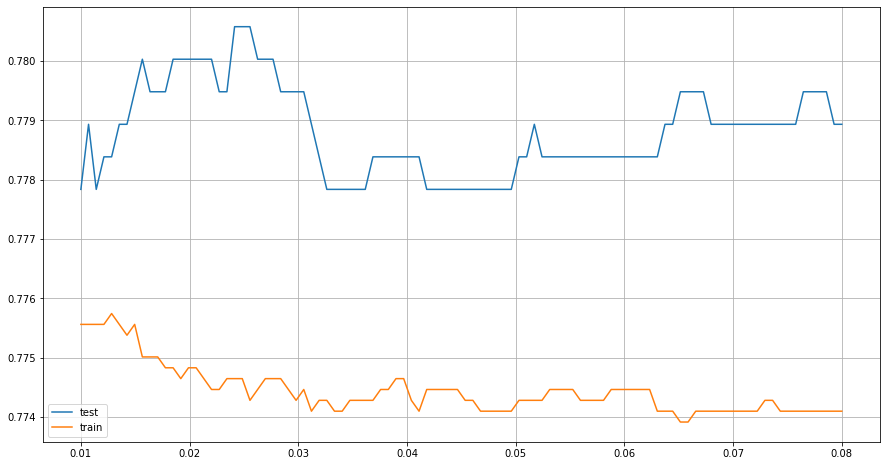

In [287]:
plt.figure(figsize=(15,8))

plt.plot(c, test, label='test')
plt.plot(c, train, label='train')
plt.legend(loc=3)
plt.grid()